In [1]:
!git clone https://github.com/AlexKly/Detailed-NER-Dataset-RU.git

Cloning into 'Detailed-NER-Dataset-RU'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 34 (delta 9), reused 31 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 458.35 KiB | 1.65 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

path_ds = 'Detailed-NER-Dataset-RU/dataset/detailed-ner_dataset-ru.pickle'
train_df = pd.read_pickle(path_ds)

In [2]:
train_df.head()


,tokens,ner_tags
0,"[dnsmasq, , 3753720, , , , , , , 1, , 0, Mar10...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[2022-09-09, 12:37:10]","[O, O]"
2,"[Повар, судовой]","[O, O]"
3,"[профилирование:, SafeData]","[O, O]"
4,"[Кораблестроение,, океанотехника, и, системоте...","[O, O, O, O, O, O, O]"


In [3]:
train_df.shape

(7532, 2)

# EDA

Размер датасета: (7532, 2)

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    7532 non-null   object
 1   ner_tags  7532 non-null   object
dtypes: object(2)
memory usage: 117.8+ KB
None

Статистическое описание числовых столбцов:
                 tokens ner_tags
count              7532     7532
unique             6736     1030
top     [строительство]      [O]
freq                 16     1741

Количество пропущенных значений:
tokens      0
ner_tags    0
dtype: int64


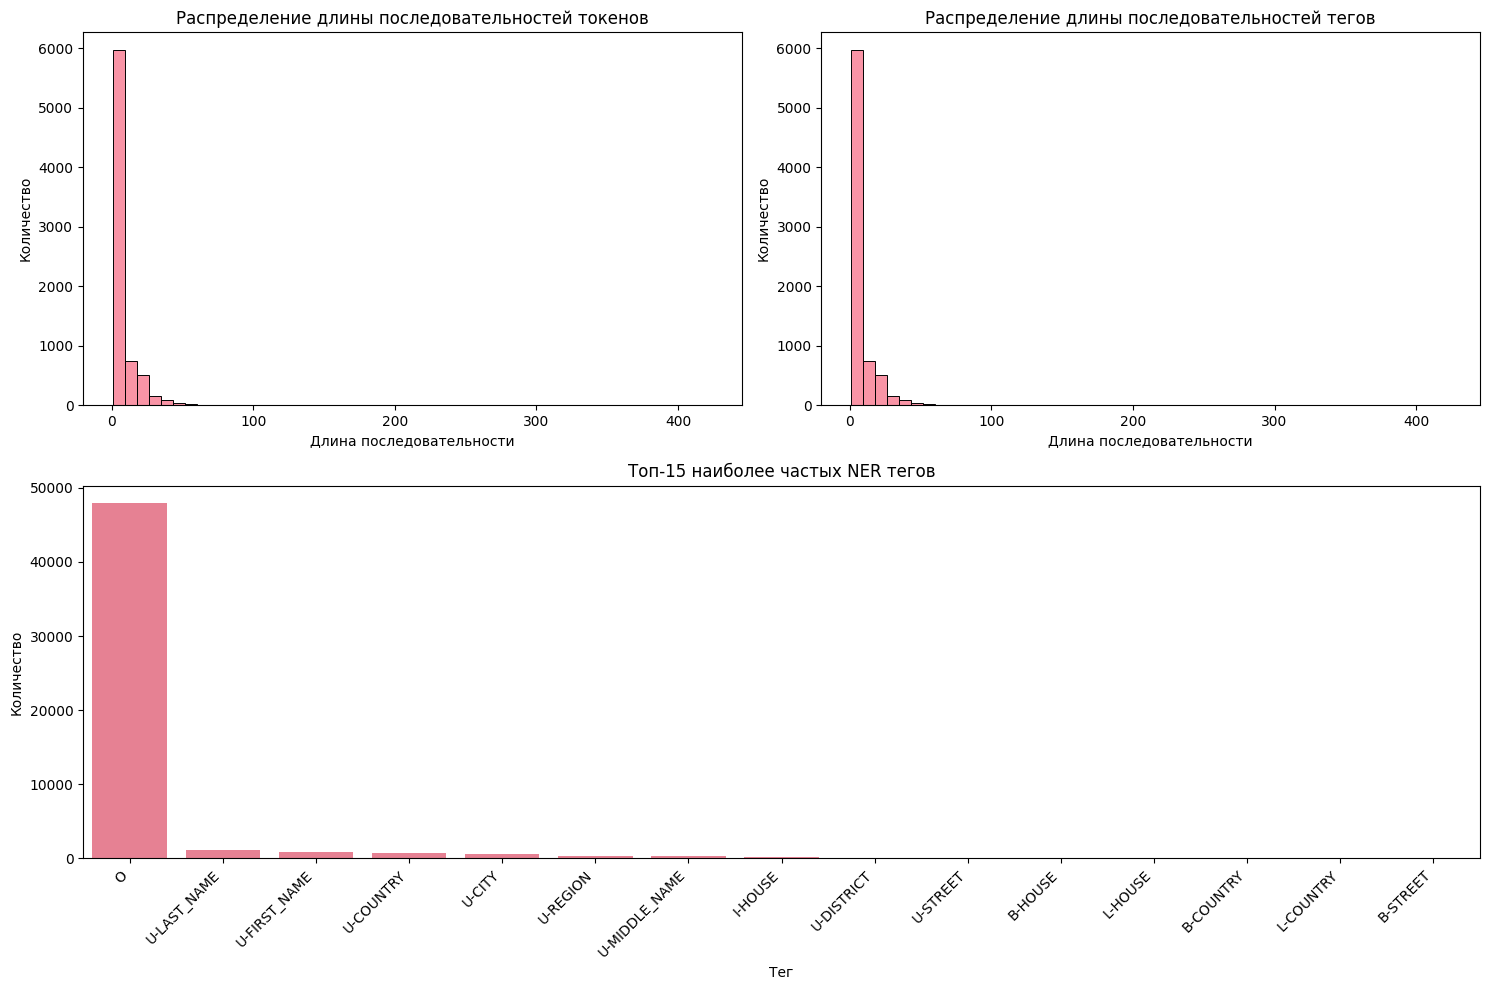


Статистика по длине последовательностей:
Средняя длина последовательности токенов: 7.02
Максимальная длина последовательности токенов: 424
Минимальная длина последовательности токенов: 1

Количество уникальных тегов: 34


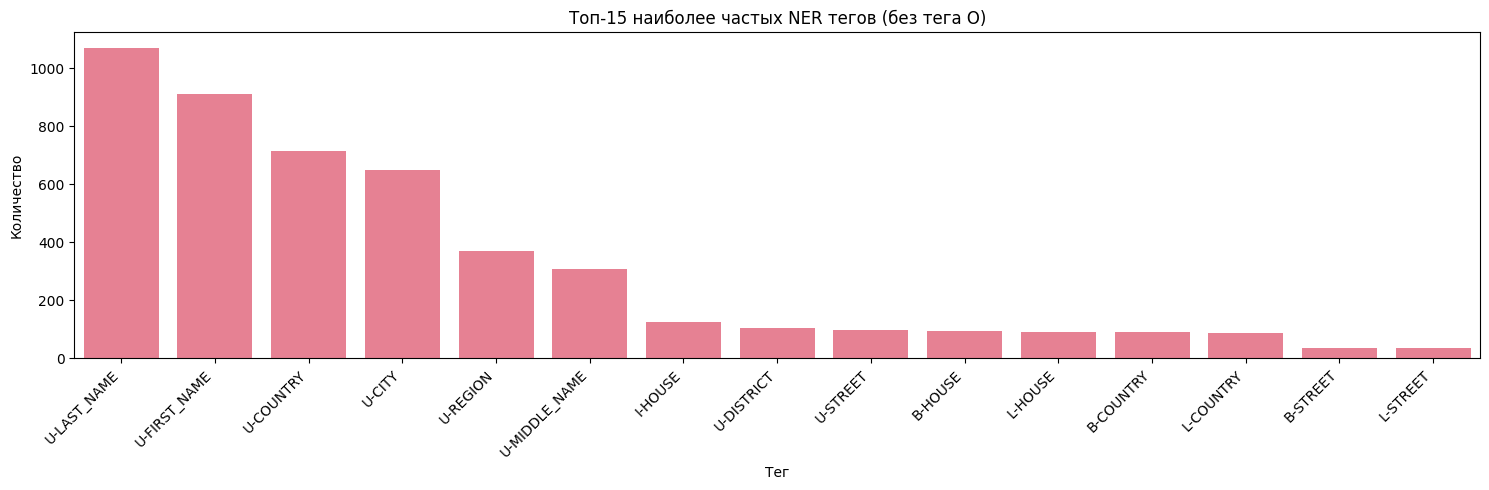


Количество уникальных тегов (без O): 33


In [3]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Настройка стиля графиков
# plt.style.use('seaborn')
sns.set_palette("husl")

# Загрузка данных
# Замените 'your_data.csv' на путь к вашему файлу с данными
df = train_df

# Базовый анализ данных
print("Размер датасета:", df.shape)
print("\nИнформация о датасете:")
print(df.info())
print("\nСтатистическое описание числовых столбцов:")
print(df.describe())

# Проверка пропущенных значений
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())

# Функция для подсчета длины последовательностей
def get_sequence_lengths(sequences):
    return [len(seq) for seq in sequences]

# Анализ длины последовательностей
token_lengths = get_sequence_lengths(df['tokens'])
tag_lengths = get_sequence_lengths(df['ner_tags'])

# Создаем графики
plt.figure(figsize=(15, 10))

# График распределения длин токенов
plt.subplot(2, 2, 1)
sns.histplot(token_lengths, bins=50)
plt.title('Распределение длины последовательностей токенов')
plt.xlabel('Длина последовательности')
plt.ylabel('Количество')

# График распределения длин тегов
plt.subplot(2, 2, 2)
sns.histplot(tag_lengths, bins=50)
plt.title('Распределение длины последовательностей тегов')
plt.xlabel('Длина последовательности')
plt.ylabel('Количество')

# Подсчет уникальных тегов
all_tags = [tag for tags in df['ner_tags'] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

# График распределения тегов
plt.subplot(2, 1, 2)
sns.barplot(x=tag_counts.index[:15], y=tag_counts.values[:15])
plt.title('Топ-15 наиболее частых NER тегов')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Тег')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# Статистика по последовательностям
print("\nСтатистика по длине последовательностей:")
print(f"Средняя длина последовательности токенов: {np.mean(token_lengths):.2f}")
print(f"Максимальная длина последовательности токенов: {np.max(token_lengths)}")
print(f"Минимальная длина последовательности токенов: {np.min(token_lengths)}")
print(f"\nКоличество уникальных тегов: {len(set(all_tags))}")

# Подсчет уникальных тегов без 'O'
tags_without_o = [tag for tag in all_tags if tag != 'O']
tag_counts_without_o = pd.Series(tags_without_o).value_counts()

# Создаем новый график для тегов без 'O'
plt.figure(figsize=(15, 5))
sns.barplot(x=tag_counts_without_o.index[:15], y=tag_counts_without_o.values[:15])
plt.title('Топ-15 наиболее частых NER тегов (без тега O)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Тег')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

print(f"\nКоличество уникальных тегов (без O): {len(set(tags_without_o))}")



# Natasha


Результаты для Natasha:
Общая точность: 0.9363
Точность без учета O: 0.5479


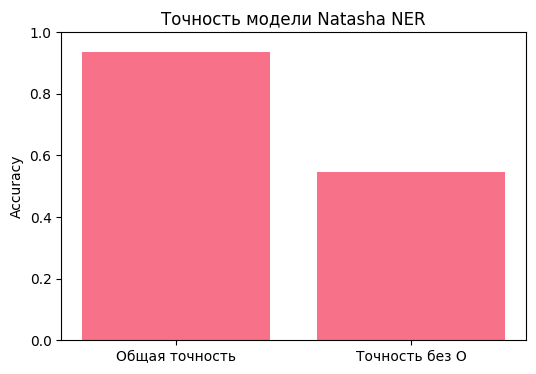

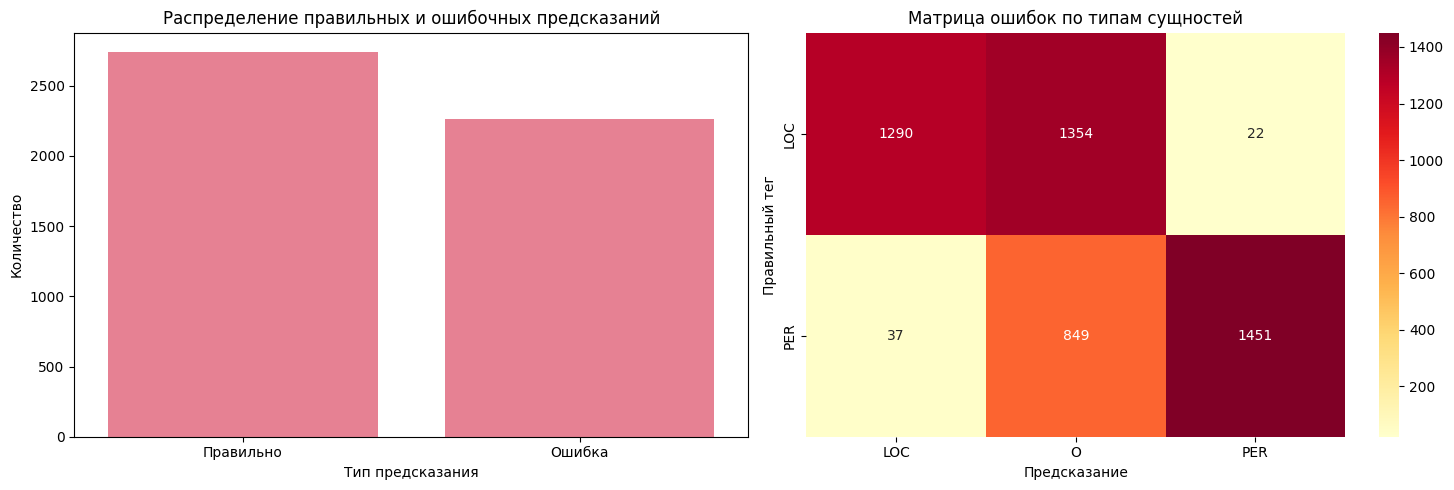


Примеры правильных предсказаний:
           Токен Правильный тег Предсказание
56   Владивосток            LOC          LOC
189        Омска            LOC          LOC
220      Красной            LOC          LOC
221      площади            LOC          LOC
223       Москва            LOC          LOC

Примеры ошибочных предсказаний:
           Токен Правильный тег Предсказание
61   Владивосток            LOC            O
63   Владивосток            LOC            O
139    России»\n            LOC            O
141       Ленина            LOC            O
143           д.            LOC            O


In [7]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsNERTagger,
    Doc
)

# Инициализация моделей Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
ner_tagger = NewsNERTagger(emb)

unique_tags = {'LOC', 'PER'}
LOC_TAGS = ['COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE']
PER_TAGS = ['LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME']

def detailed2default(tags: list) -> list:
    """ Replace NER-tags to default: LOC and PER.

    Map of default tags:

    LOC: 'COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE'

    PER: 'LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME'

    :param tags: NER-tags for text tokens.
    :return: Relabeled NER-tokens.
    """
    return [f'LOC' if tag.split('-')[-1] in LOC_TAGS else
            f'PER' if tag.split('-')[-1] in PER_TAGS else
            tag for tag in tags]


# Оценка модели Natasha
def evaluate_model(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        # Natasha
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_ner(ner_tagger)
        
        # Создаем список тегов той же длины, что и true_tags
        natasha_pred = ['O'] * len(true_tags)
        
        # Для каждого найденного спана проставляем соответствующий тег
        for span in doc.spans:
            if span.type in unique_tags:
                # Находим токены, соответствующие спану
                span_tokens = text[span.start:span.stop].split()
                span_len = len(span_tokens)
                
                # Ищем начальную позицию спана в списке токенов
                start_pos = 0
                for i, token in enumerate(row['tokens']):
                    if token == span_tokens[0]:
                        start_pos = i
                        break
                        
                # Проставляем тег для всех токенов спана
                for i in range(start_pos, start_pos + span_len):
                    if i < len(natasha_pred):
                        natasha_pred[i] = span.type
        
        # Сохранение результатов
        results['true'].extend(true_tags)
        results['pred'].extend(natasha_pred)
        results['tokens'].extend(row['tokens'])
    
    return results

# Оценка результатов
results = evaluate_model(df)

# Вывод метрик для Natasha без учета тега O
true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\nРезультаты для Natasha:")
print(f"Общая точность: {accuracy:.4f}")
print(f"Точность без учета O: {accuracy_no_o:.4f}")

# Визуализация результатов точности
plt.figure(figsize=(6, 4))
plt.bar(['Общая точность', 'Точность без O'], [accuracy, accuracy_no_o])
plt.title('Точность модели Natasha NER')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Создаем DataFrame для анализа результатов
analysis_df = pd.DataFrame({
    'Токен': results['tokens'],
    'Правильный тег': results['true'],
    'Предсказание': results['pred']
})

# Фильтруем только значимые предсказания (не O)
significant_df = analysis_df[analysis_df['Правильный тег'] != 'O'].copy()
significant_df['Тип'] = significant_df.apply(
    lambda x: 'Правильно' if x['Правильный тег'] == x['Предсказание'] else 'Ошибка', 
    axis=1
)

# Визуализация распределения ошибок и правильных предсказаний
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=significant_df, x='Тип')
plt.title('Распределение правильных и ошибочных предсказаний')
plt.xlabel('Тип предсказания')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
confusion_matrix_df = pd.crosstab(
    significant_df['Правильный тег'], 
    significant_df['Предсказание']
)
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Матрица ошибок по типам сущностей')

plt.tight_layout()
plt.show()

# Вывод примеров
print("\nПримеры правильных предсказаний:")
correct_examples = significant_df[significant_df['Тип'] == 'Правильно'].head()
print(correct_examples[['Токен', 'Правильный тег', 'Предсказание']])

print("\nПримеры ошибочных предсказаний:")
error_examples = significant_df[significant_df['Тип'] == 'Ошибка'].head()
print(error_examples[['Токен', 'Правильный тег', 'Предсказание']])


Как будто у меня в датасете проставлены теги чуть по-другому, чем это делает Natasha.

In [50]:
from ipymarkup import show_span_box_markup

print("\nПервые 500 токенов с правильной разметкой:")
tokens = analysis_df['Токен'].tolist()[:500]
true_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['Правильный тег'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['Токен'])
        true_spans.append((start, end, row['Правильный тег']))

text = ' '.join(tokens)
show_span_box_markup(text, true_spans)

print("\nТе же токены с предсказанной разметкой:")
pred_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['Предсказание'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['Токен'])
        pred_spans.append((start, end, row['Предсказание']))

show_span_box_markup(text, pred_spans)


Первые 500 токенов с правильной разметкой:



Те же токены с предсказанной разметкой:



Ну наташа по дефолту немного чудит, Владивосток в одном месте у нее LOC, а в другом O.
Зато она выделяет сокращенные имена, как PER. Но тут у нас ведь был детальный датасет, в котором было FIRST_NAME и LAST_NAME. Видимо они почситали, что сокращенные имена это не имена.
Также она не понимает английские имена, например PISAREVA.



In [18]:
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger

morph_vocab = MorphVocab()
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def is_country(token, prev_token):
    if prev_token and prev_token.text.lower() == "страна" and token.text[0].isupper():
        return True
    return False

def is_region(token, next_token):
    if next_token and next_token.text.lower() in ["область", "край", "губерния", "регион"] and token.text[0].isupper():
        return True
    return False

def is_city(token, prev_token):
    if prev_token and prev_token.text.lower() in ["город", "г."] and token.text[0].isupper():
        return True
    return False

def is_district(token, prev_token, next_token):
    # Район может быть до или после
    if ((prev_token and prev_token.text.lower() == "район") or
        (next_token and next_token.text.lower() == "район")) and token.text[0].isupper():
        return True
    return False

def is_street(token, prev_token, next_token):
    street_markers = ["ул.", "улица", "пр.", "проспект"]
    if ((prev_token and prev_token.text.lower() in street_markers and token.text[0].isupper()) or
        (next_token and next_token.text.lower() in street_markers and token.text[0].isupper())):
        return True
    return False

def is_house(token, prev_token):
    if prev_token and prev_token.text.lower() in ["дом", "д."] and any(ch.isdigit() for ch in token.text):
        return True
    return False

def is_last_name(token):
    # Фамильные окончания
    last_endings = ["ов", "ев", "ёв", "ин", "ын", "ий", "ый"]
    word = token.text
    if token.pos == "PROPN" and word[0].isupper() and any(word.endswith(end) for end in last_endings):
        return True
    return False

def is_middle_name(token):
    # Отчества
    middle_endings = ["вич", "вна"]
    word = token.text
    if token.pos == "PROPN" and word[0].isupper() and any(word.endswith(end) for end in middle_endings):
        return True
    return False

def is_first_name(token):
    # Имя: PROPN, с заглавной, не фамилия, не отчество
    # Нет точных правил без словаря, но для демонстрации достаточно этой эвристики.
    word = token.text
    if token.pos == "PROPN" and word[0].isupper() and not is_last_name(token) and not is_middle_name(token):
        return True
    return False

def tag_tokens(tokens_list):
    # Создаем документ из списка токенов
    text = ' '.join(tokens_list)
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    # Лемматизация для нормализации (может помочь в случае неоднозначностей)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)

    tokens = doc.tokens
    tagged = []
    
    # Проверяем что количество токенов совпадает
    if len(tokens) != len(tokens_list):
        # Если токенизация не совпала, возвращаем все токены с тегом O
        return [(token, "O") for token in tokens_list]
        
    for i, token in enumerate(tokens):
        prev_token = tokens[i-1] if i > 0 else None
        next_token = tokens[i+1] if i < len(tokens)-1 else None

        # Сначала LOC
        if is_country(token, prev_token):
            tagged.append((tokens_list[i], "COUNTRY"))
        elif is_region(token, next_token):
            tagged.append((tokens_list[i], "REGION"))
        elif is_city(token, prev_token):
            tagged.append((tokens_list[i], "CITY"))
        elif is_district(token, prev_token, next_token):
            tagged.append((tokens_list[i], "DISTRICT"))
        elif is_street(token, prev_token, next_token):
            tagged.append((tokens_list[i], "STREET"))
        elif is_house(token, prev_token):
            tagged.append((tokens_list[i], "HOUSE"))
        else:
            # Не локация -> проверяем персоналии
            if is_last_name(token):
                tagged.append((tokens_list[i], "LAST_NAME"))
            elif is_middle_name(token):
                tagged.append((tokens_list[i], "MIDDLE_NAME"))
            elif is_first_name(token):
                tagged.append((tokens_list[i], "FIRST_NAME"))
            else:
                tagged.append((tokens_list[i], "O"))
    return tagged

# Тестовые примеры:
examples = [
    ["Страна", "Россия", "большая", "."],
    ["Я", "живу", "в", "город", "Москва", "."],
    ["Это", "Иванов", "Иван", "Иванович", "."],
    ["Проехали", "улицу", "Ленина", "."],
    ["Подъезжаем", "к", "дом", "10", "."],
    ["На", "территории", "Свердловская", "область", "много", "заводов", "."],
    ["Мы", "отправились", "в", "район", "Пресненский", "."]
]

for ex in examples:
    print(ex, "=>", tag_tokens(ex))


['Страна', 'Россия', 'большая', '.'] => [('Страна', 'O'), ('Россия', 'COUNTRY'), ('большая', 'O'), ('.', 'O')]
['Я', 'живу', 'в', 'город', 'Москва', '.'] => [('Я', 'O'), ('живу', 'O'), ('в', 'O'), ('город', 'O'), ('Москва', 'CITY'), ('.', 'O')]
['Это', 'Иванов', 'Иван', 'Иванович', '.'] => [('Это', 'O'), ('Иванов', 'LAST_NAME'), ('Иван', 'FIRST_NAME'), ('Иванович', 'MIDDLE_NAME'), ('.', 'O')]
['Проехали', 'улицу', 'Ленина', '.'] => [('Проехали', 'O'), ('улицу', 'O'), ('Ленина', 'FIRST_NAME'), ('.', 'O')]
['Подъезжаем', 'к', 'дом', '10', '.'] => [('Подъезжаем', 'FIRST_NAME'), ('к', 'O'), ('дом', 'O'), ('10', 'HOUSE'), ('.', 'O')]
['На', 'территории', 'Свердловская', 'область', 'много', 'заводов', '.'] => [('На', 'O'), ('территории', 'O'), ('Свердловская', 'REGION'), ('область', 'O'), ('много', 'O'), ('заводов', 'O'), ('.', 'O')]
['Мы', 'отправились', 'в', 'район', 'Пресненский', '.'] => [('Мы', 'O'), ('отправились', 'O'), ('в', 'O'), ('район', 'O'), ('Пресненский', 'DISTRICT'), ('.', 'O


Результаты для нашей модели:
Общая точность: 0.9009
Точность без учета O: 0.3130


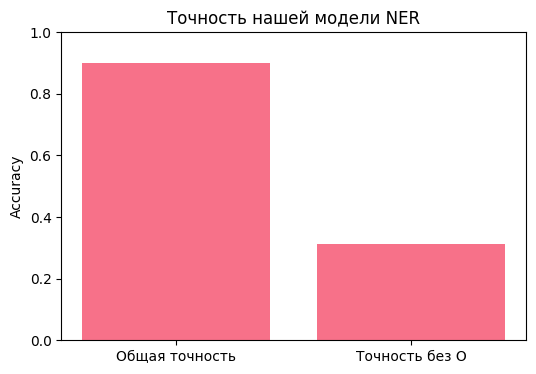

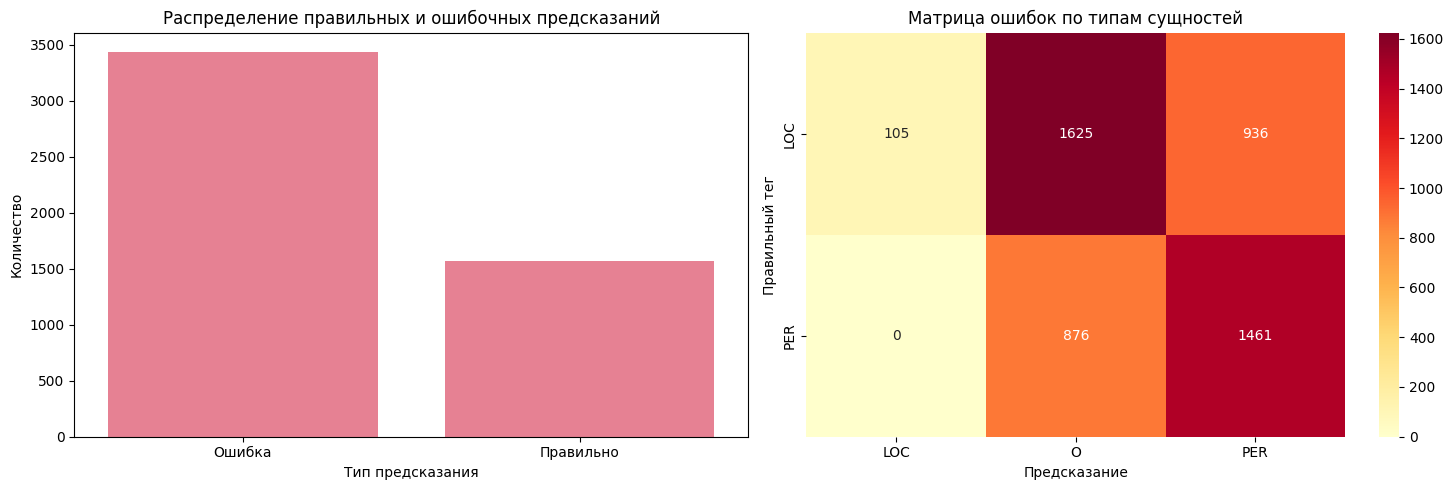


Примеры правильных предсказаний:
           Токен Правильный тег Предсказание
245         Саид            PER          PER
247       Махмуд            PER          PER
281      Алексея            PER          PER
282  Кузьмицкого            PER          PER
314         Якуп            PER          PER

Примеры ошибочных предсказаний:
           Токен Правильный тег Предсказание
56   Владивосток            LOC            O
61   Владивосток            LOC            O
63   Владивосток            LOC            O
139    России»\n            LOC            O
141       Ленина            LOC            O


In [20]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsNERTagger,
    Doc
)

# Инициализация моделей Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
ner_tagger = NewsNERTagger(emb)

unique_tags = {'LOC', 'PER'}
LOC_TAGS = ['COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE']
PER_TAGS = ['LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME']

def detailed2default(tags: list) -> list:
    """ Replace NER-tags to default: LOC and PER.

    Map of default tags:

    LOC: 'COUNTRY', 'REGION', 'CITY', 'DISTRICT', 'STREET', 'HOUSE'

    PER: 'LAST_NAME', 'FIRST_NAME', 'MIDDLE_NAME'

    :param tags: NER-tags for text tokens.
    :return: Relabeled NER-tokens.
    """
    return [f'LOC' if tag.split('-')[-1] in LOC_TAGS else
            f'PER' if tag.split('-')[-1] in PER_TAGS else
            tag for tag in tags]

# Оценка модели с использованием tag_tokens
def evaluate_model(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        # Используем tag_tokens вместо Natasha
        tagged = tag_tokens(row['tokens'])
        pred_tags = ['O'] * len(true_tags)
        
        # Преобразуем результаты tag_tokens в формат для сравнения
        for i, (token, tag) in enumerate(tagged):
            if tag in LOC_TAGS:
                pred_tags[i] = 'LOC'
            elif tag in PER_TAGS:
                pred_tags[i] = 'PER'
        
        # Сохранение результатов
        results['true'].extend(true_tags)
        results['pred'].extend(pred_tags)
        results['tokens'].extend(row['tokens'])
    
    return results

# Оценка результатов
results = evaluate_model(df)

# Вывод метрик без учета тега O
true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\nРезультаты для нашей модели:")
print(f"Общая точность: {accuracy:.4f}")
print(f"Точность без учета O: {accuracy_no_o:.4f}")

# Визуализация результатов точности
plt.figure(figsize=(6, 4))
plt.bar(['Общая точность', 'Точность без O'], [accuracy, accuracy_no_o])
plt.title('Точность нашей модели NER')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Создаем DataFrame для анализа результатов
analysis_df = pd.DataFrame({
    'Токен': results['tokens'],
    'Правильный тег': results['true'],
    'Предсказание': results['pred']
})

# Фильтруем только значимые предсказания (не O)
significant_df = analysis_df[analysis_df['Правильный тег'] != 'O'].copy()
significant_df['Тип'] = significant_df.apply(
    lambda x: 'Правильно' if x['Правильный тег'] == x['Предсказание'] else 'Ошибка', 
    axis=1
)

# Визуализация распределения ошибок и правильных предсказаний
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=significant_df, x='Тип')
plt.title('Распределение правильных и ошибочных предсказаний')
plt.xlabel('Тип предсказания')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
confusion_matrix_df = pd.crosstab(
    significant_df['Правильный тег'], 
    significant_df['Предсказание']
)
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Матрица ошибок по типам сущностей')

plt.tight_layout()
plt.show()

# Вывод примеров
print("\nПримеры правильных предсказаний:")
correct_examples = significant_df[significant_df['Тип'] == 'Правильно'].head()
print(correct_examples[['Токен', 'Правильный тег', 'Предсказание']])

print("\nПримеры ошибочных предсказаний:")
error_examples = significant_df[significant_df['Тип'] == 'Ошибка'].head()
print(error_examples[['Токен', 'Правильный тег', 'Предсказание']])


In [80]:
from ipymarkup import show_span_box_markup

print("\nПервые 500 токенов с правильной разметкой:")
tokens = analysis_df['Токен'].tolist()[:500]
true_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['Правильный тег'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['Токен'])
        true_spans.append((start, end, row['Правильный тег']))

text = ' '.join(tokens)
show_span_box_markup(text, true_spans)

print("\nТе же токены с предсказанной разметкой:")
pred_spans = []
for i, row in analysis_df.iloc[:500].iterrows():
    if row['Предсказание'] != 'O':
        start = len(' '.join(tokens[:i]))
        if i > 0:
            start += 1  # Add space
        end = start + len(row['Токен'])
        pred_spans.append((start, end, row['Предсказание']))

show_span_box_markup(text, pred_spans)


Первые 500 токенов с правильной разметкой:



Те же токены с предсказанной разметкой:


Показываете, что все ваши правила работают корректно и не конфликтуют друг с другом.

Не уверен, что это получилось выполнить, но тем не менее, у нас есть точность около 30% для таких сложных классов.
Мы постарались убрать конфликты правил друг с другом путем выполнения их в определенном порядке.

# BERT

Сначала разделим датасет на train и test и сделаем замер Natasha на тестовом сплите

In [9]:
test = df.iloc[:1000]
train = df.iloc[1000:]

In [19]:
# Оценка результатов
results = evaluate_model(test)
print(results["true"])
print(results["pred"])

# Вывод метрик для Natasha без учета тега O
true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\nРезультаты для Natasha:")
print(f"Общая точность: {accuracy:.4f}")
print(f"Точность без учета O: {accuracy_no_o:.4f}")

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'LOC', 'O', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'LOC', 'O', 'LOC', 'LOC', 'O', 'LOC', 'LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'PER', 'O', 'O', 'O', 'O', 'O', 'O', 'LOC', 'O', 'O', 'O', 'O', 'PER', 

Загрузим модель и прогоним на тестовом сете

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("./bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("./bert-base-NER").cuda()

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

ner_classes_dict = {
    "I-PER": "PER",
    "B-PER": "PER",
    "I-LOC": "LOC",
    "B-LOC": "LOC"
}

def evaluate_bert(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        bert_pred = ['O'] * len(true_tags)
        inference_results = ner_pipeline(text)
        for res in inference_results:
            # print(bert_pred)
            # print(res["index"] - 1)
            if res["index"] > len(true_tags):
                continue
            bert_pred[res["index"] - 1] = ner_classes_dict.get(res["entity"], "O")

        results['true'].extend(true_tags)
        results['pred'].extend(bert_pred)
        results['tokens'].extend(row['tokens'])
    
    return results

results = evaluate_bert(test)

true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\nРезультаты для BERT:")
print(f"Общая точность: {accuracy:.4f}")
print(f"Точность без учета O: {accuracy_no_o:.4f}")

Some weights of the model checkpoint at /home/max/models/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Результаты для BERT:
Общая точность: 0.8934
Точность без учета O: 0.0868


Как видим, результаты не очень хорошие. Попробуем обучить на релевантных данных

In [ ]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification

labels = list(set(all_tags))
label2id = {k: v for v, k in enumerate(labels)}
id2label = dict((v, k) for k, v in label2id.items())

device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = AutoTokenizer.from_pretrained("./bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained(
    "./bert-base-NER",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

/home/max/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at /home/max/models/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the m

In [10]:
import ast

import datasets

train['tokens'] = train['tokens'].astype(str).apply(lambda x: ast.literal_eval(x))
train['ner_tags'] = train['ner_tags'].astype(str).apply(lambda x: ast.literal_eval(x))

train = train.sample(frac=1)
train_ds = datasets.Dataset.from_pandas(
    train.reset_index().drop('index', axis=1)
)

/tmp/ipykernel_150092/1147643212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokens'] = train['tokens'].astype(str).apply(lambda x: ast.literal_eval(x))
/tmp/ipykernel_150092/1147643212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ner_tags'] = train['ner_tags'].astype(str).apply(lambda x: ast.literal_eval(x))


In [11]:
def tokenize_and_align_labels(ds: datasets.arrow_dataset.Dataset) -> transformers.tokenization_utils_base.BatchEncoding:
    label_all_tokens = True
    tokenized_inputs = tokenizer(ds['tokens'], truncation=True, padding=True, is_split_into_words=True, max_length=512)
    labels = list()
    for i, label in enumerate(ds[f'ner_tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = list()
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label2id[label[word_idx]])
            else:
                label_ids.append(label2id[label[word_idx]] if label_all_tokens else -100)
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs['labels'] = labels

    return tokenized_inputs

tokenized_train_ds = train_ds.map(tokenize_and_align_labels, batched=True)

Map: 100%|██████████| 6532/6532 [00:01<00:00, 5181.93 examples/s]


In [12]:
from transformers import TrainingArguments, DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)
train_args = TrainingArguments(
    'bert_base_ru',
    evaluation_strategy='no',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    push_to_hub=False,
    report_to=None,
)

trainer = transformers.Trainer(
    model,
    train_args,
    train_dataset=tokenized_train_ds,
    data_collator=data_collator,
    tokenizer=tokenizer
)

# Train and validate:
trainer.train()

/home/max/envs/nlp/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_150092/1920097939.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = transformers.Trainer(


Step,Training Loss
500,0.331800
1000,0.157500
1500,0.101300
2000,0.067800
2500,0.045900
3000,0.031100
3500,0.023900
4000,0.019700


TrainOutput(global_step=4090, training_loss=0.09556022442349012, metrics={'train_runtime': 2204.0034, 'train_samples_per_second': 29.637, 'train_steps_per_second': 1.856, 'total_flos': 1.707284206608384e+16, 'train_loss': 0.09556022442349012, 'epoch': 10.0})

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("./checkpoint-4090")
model = AutoModelForTokenClassification.from_pretrained("./checkpoint-4090").cuda()

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

def evaluate_trained_bert(df):
    results = {'true': [], 'pred': [], 'tokens': []}
    
    for idx, row in df.iterrows():
        text = ' '.join(row['tokens'])
        true_tags = detailed2default(row['ner_tags'])
        
        bert_pred = ['O'] * len(true_tags)
        inference_results = ner_pipeline(text)
        for res in inference_results:
            if res["index"] > len(true_tags):
                continue
            bert_pred[res["index"] - 1] = res["entity"]
            bert_pred = detailed2default(bert_pred)
        

        results['true'].extend(true_tags)
        results['pred'].extend(bert_pred)
        results['tokens'].extend(row['tokens'])
    
    return results

results = evaluate_trained_bert(test)

true_filtered = [t for t, p in zip(results['true'], results['pred']) if t != 'O']
pred_filtered = [p for t, p in zip(results['true'], results['pred']) if t != 'O']

total = len(results['true'])
total_no_o = len(true_filtered)
correct = sum(1 for t, p in zip(results['true'], results['pred']) if t == p)
correct_no_o = sum(1 for t, p in zip(true_filtered, pred_filtered) if t == p)

accuracy = correct / total
accuracy_no_o = correct_no_o / total_no_o if total_no_o > 0 else 0

print("\nРезультаты для BERT:")
print(f"Общая точность: {accuracy:.4f}")
print(f"Точность без учета O: {accuracy_no_o:.4f}")

Device set to use cuda:0



Результаты для BERT:
Общая точность: 0.8628
Точность без учета O: 0.3029


# Выводы
* Хорошо обученные нейросетевые решения, в частности трансформеры лучше rule-based решений
* Необходима тренировка на релевантных данных (в первую очередь язык), модель натренированная на нерелевантных данных хуже rule-based решения
* Encoder-only трансформеры показывают себя неплохо, имеет смысл попробовать генеративные encoder-decoder и decoder-only
* Кажется, что accuracy по классам кроме "O" более репрезентативна

# Возможности для улучшения
* Использования bert large вместо base
* Претрейн модели на русском языке, либо файнтюн русскоязычного не ner bert
* Использовать roberta или encoder-decoder, в частности t5